In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import warnings

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from sklearn.ensemble import RandomForestRegressor
from tsfresh.utilities.dataframe_functions import make_forecasting_frame

import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('final.csv')

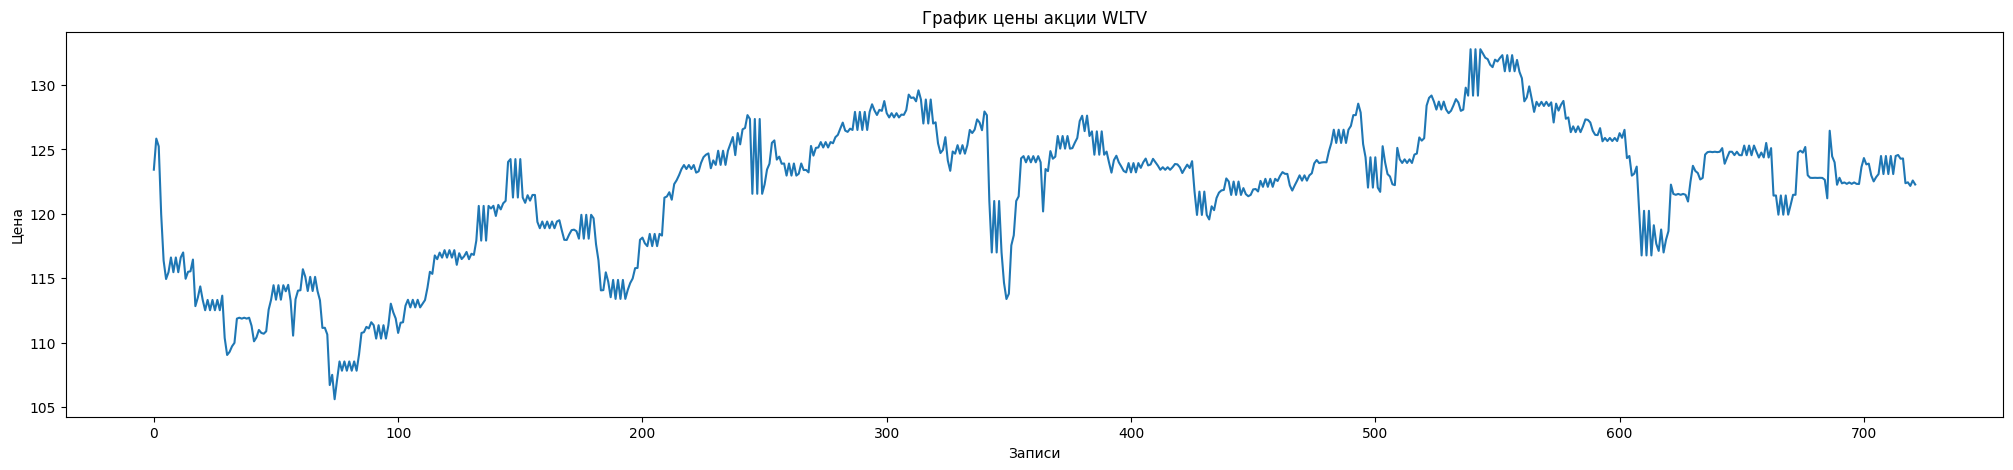

In [ ]:
plt.figure(figsize=(25, 5))
plt.plot(df['value'])
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.title('График цены акции WLTV')
plt.show()

## Выявление сезонности, тренда, остатка

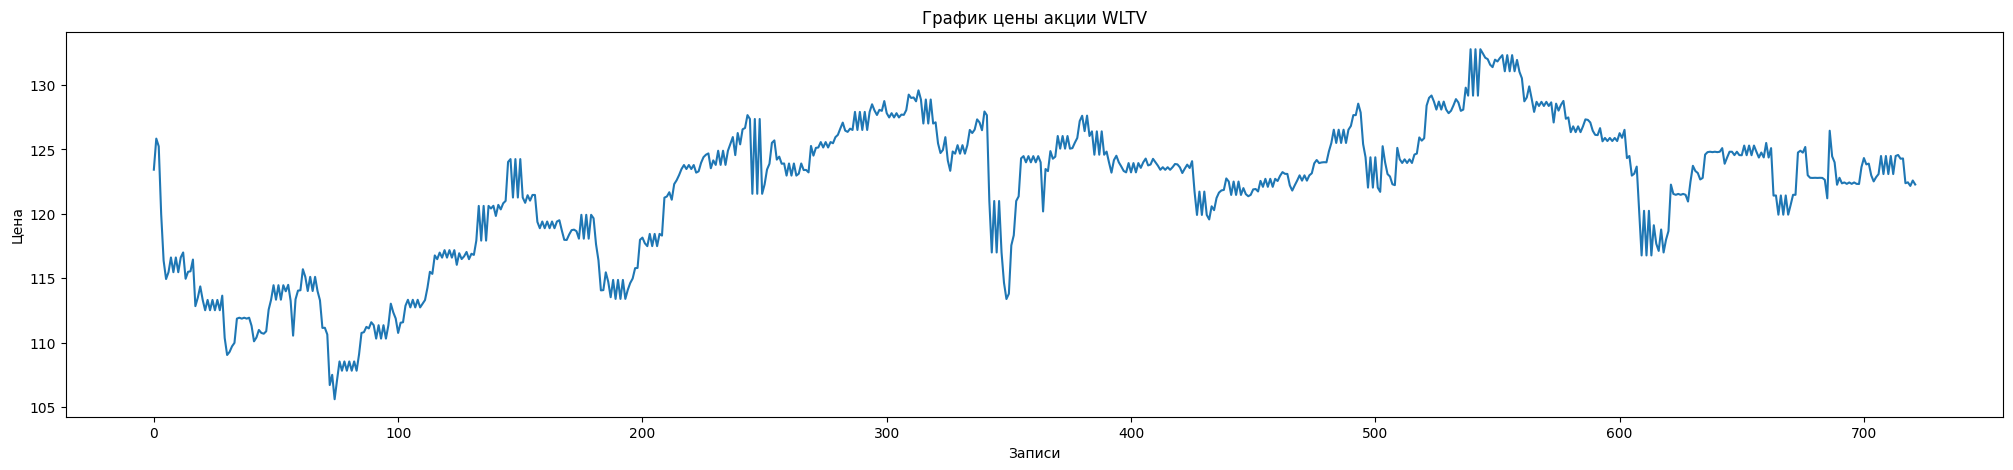

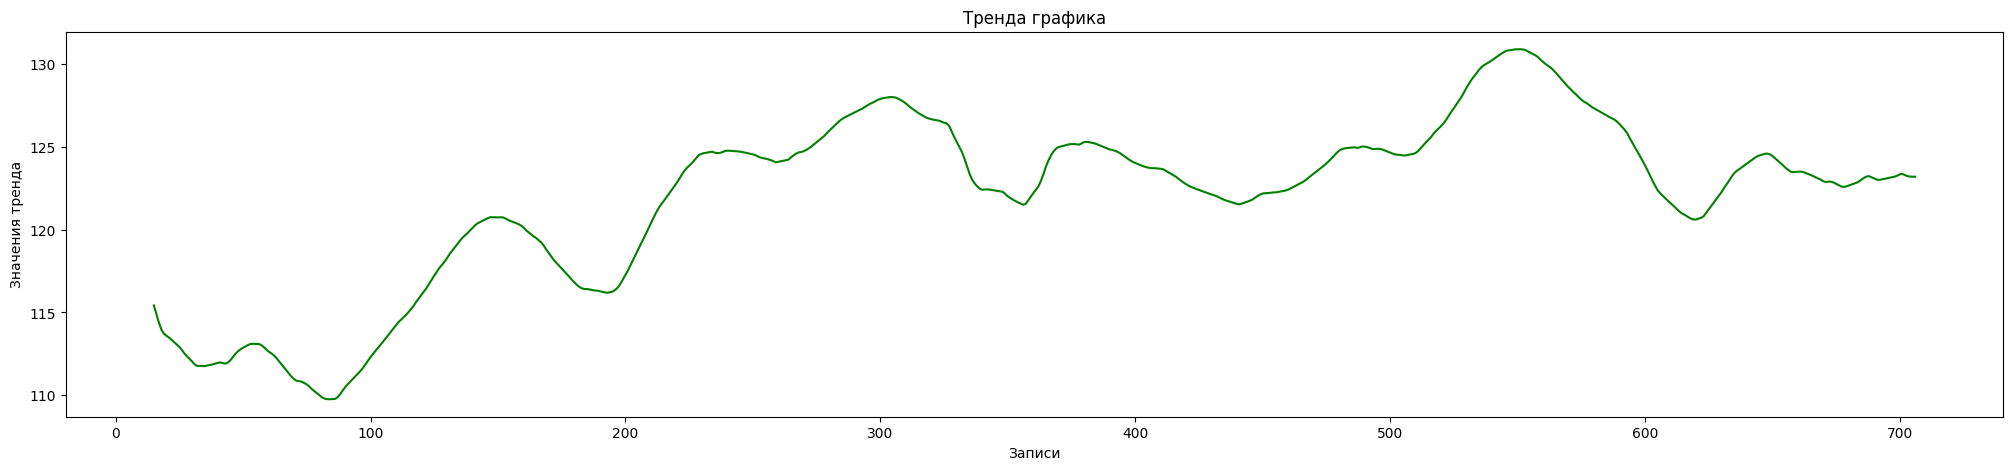

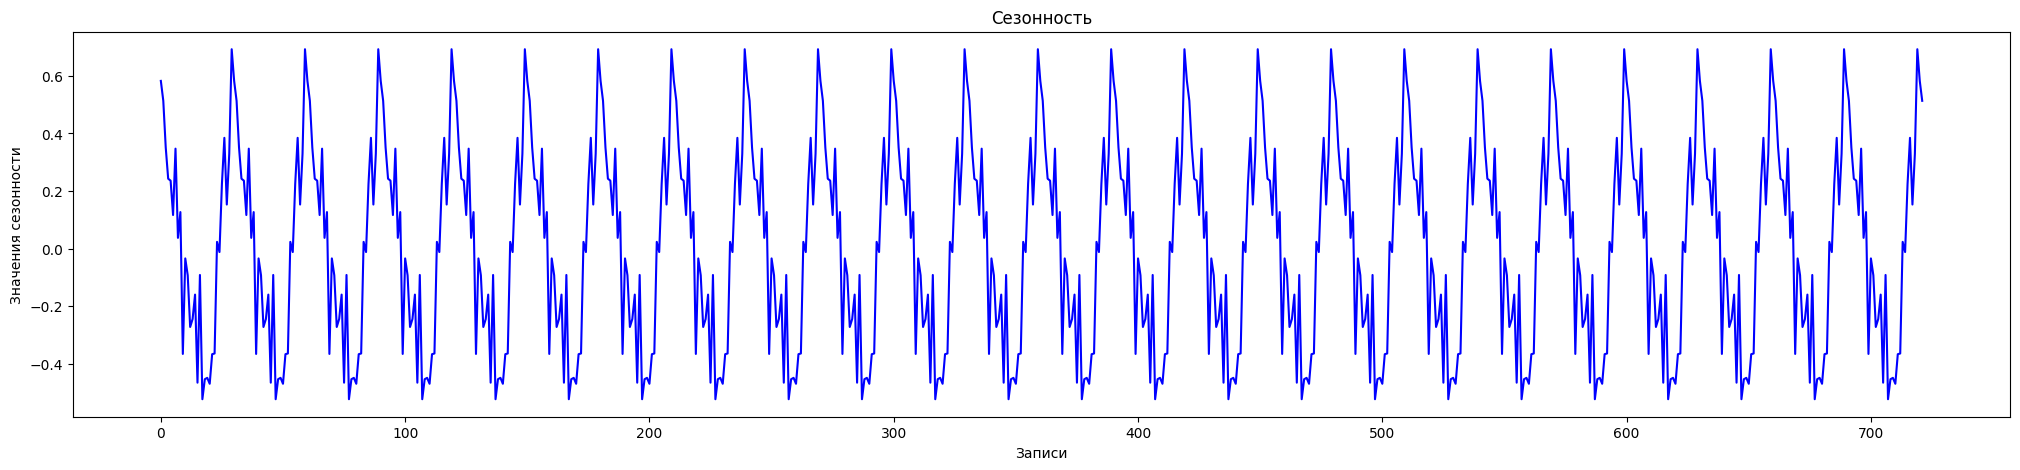

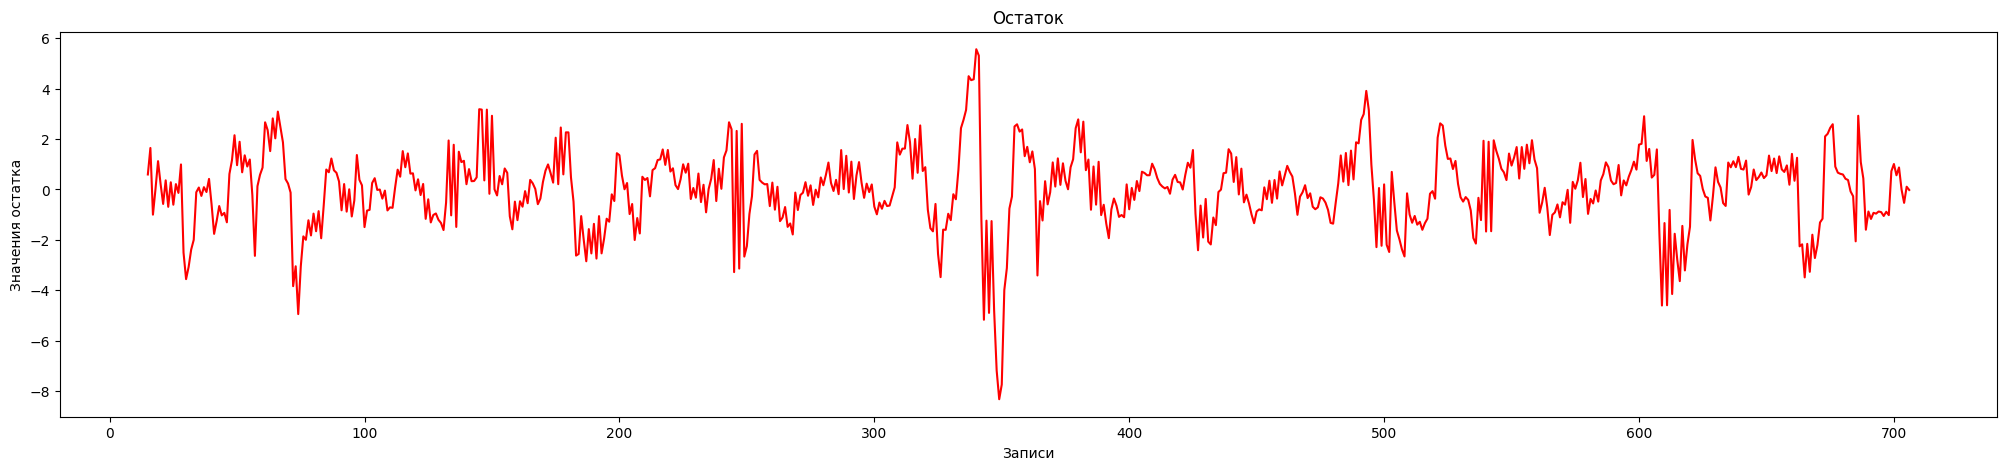

In [ ]:
result = seasonal_decompose(df['value'], model = 'additive', period = 30)

plt.figure(figsize = (25, 5))
plt.plot(df['value'])
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.title('График цены акции WLTV')
plt.show()

plt.figure(figsize = (25, 5))
plt.plot(result.trend, color = 'green')
plt.xlabel('Записи')
plt.ylabel('Значения тренда')
plt.title('Тренда графика')
plt.show()

plt.figure(figsize = (25, 5))
plt.plot(result.seasonal,  color = 'blue')
plt.xlabel('Записи')
plt.ylabel('Значения сезoнности')
plt.title('Сезонность')
plt.show()

plt.figure(figsize = (25, 5))
plt.plot(result.resid, color = 'red')
plt.xlabel('Записи')
plt.ylabel('Значения остатка')
plt.title('Остаток')
plt.show()

Подготовка данных

In [ ]:
df_new = df.copy()
df_new['trend'] = result.trend
df_new['seasonal'] = result.seasonal
df_new['resid'] = result.resid

#df_new = df_new.fillna(df_new['trend'].mean())

In [ ]:
df_new

,Unnamed: 0,date,value,trend,seasonal,resid
0,0,2016-01-05,123.430000,NaN,0.582345,NaN
1,1,2016-01-05,125.839996,NaN,0.513120,NaN
2,2,2016-01-06,125.239998,NaN,0.351185,NaN
3,3,2016-01-06,119.980003,NaN,0.242764,NaN
4,4,2016-01-07,116.379997,NaN,0.235888,NaN
...,...,...,...,...,...,...
717,717,2016-12-28,122.379997,NaN,0.153105,NaN
718,718,2016-12-29,122.449997,NaN,0.329692,NaN
719,719,2016-12-29,122.169998,NaN,0.692279,NaN
720,720,2016-12-30,122.589996,NaN,0.582345,NaN


In [ ]:
df_new['trend'] = df_new['trend'].fillna(df_new['trend'].mean())
df_new['resid'] = df_new['resid'].fillna(df_new['resid'].mean())

In [ ]:
df_new

,Unnamed: 0,date,value,trend,seasonal,resid
0,0,2016-01-05,123.430000,121.970113,0.582345,-0.016779
1,1,2016-01-05,125.839996,121.970113,0.513120,-0.016779
2,2,2016-01-06,125.239998,121.970113,0.351185,-0.016779
3,3,2016-01-06,119.980003,121.970113,0.242764,-0.016779
4,4,2016-01-07,116.379997,121.970113,0.235888,-0.016779
...,...,...,...,...,...,...
717,717,2016-12-28,122.379997,121.970113,0.153105,-0.016779
718,718,2016-12-29,122.449997,121.970113,0.329692,-0.016779
719,719,2016-12-29,122.169998,121.970113,0.692279,-0.016779
720,720,2016-12-30,122.589996,121.970113,0.582345,-0.016779


In [ ]:
df_shift, y = make_forecasting_frame(df_new["value"], kind="power", max_timeshift=10, rolling_direction=1)

# 2. Извлечение признаков
X = extract_features(df_shift, column_id="id", column_sort="time", column_value="value", impute_function=np.nanmean, show_warnings=False)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 29/29 [00:22<00:00,  1.28it/s]


In [ ]:
X['trend'] = df_new['trend'].iloc[-len(X):].values
X['seasonal'] = df_new['seasonal'].iloc[-len(X):].values
X['resid'] = df_new['resid'].iloc[-len(X):].values

In [ ]:
X

value__variance_larger_than_standard_deviation  \
id 1                                               0.0   
   2                                               1.0   
   3                                               1.0   
   4                                               1.0   
   5                                               1.0   
...                                                ...   
   717                                             0.0   
   718                                             0.0   
   719                                             0.0   
   720                                             0.0   
   721                                             0.0   

        value__has_duplicate_max  value__has_duplicate_min  \
id 1                         0.0                       0.0   
   2                         0.0                       0.0   
   3                         0.0                       0.0   
   4                         0.0                       0.0   
   5                         0.0                       0.0   
...                          ...                       ...   
   717                       0.0                       1.0   
   718                       0.0                       0.0   
   719                       0.0                       0.0   
   720                       0.0                       0.0   
   721                       0.0                       0.0   

        value__has_duplicate  value__sum_values  value__abs_energy  \
id 1                     0.0         123.430000       15234.964900   
   2                     0.0         249.269996       31070.669493   
   3                     0.0         374.509994       46755.726592   
   4                     0.0         494.489997       61150.927712   
   5                     0.0         610.869994       74695.231414   
...                      ...                ...                ...   
   717                   1.0        1240.379982      153858.173551   
   718                   1.0        1238.269981      153337.277615   
   719                   1.0        1237.629982      153180.132265   
   720                   1.0        1235.309982      152607.881074   
   721                   1.0        1234.809982      152485.041078   

        value__mean_abs_change  value__mean_change  \
id 1                       NaN                 NaN   
   2                  2.409996            2.409996   
   3                  1.504997            0.904999   
   4                  2.756663           -1.149999   
   5                  2.967499           -1.762501   
...                        ...                 ...   
   717                0.976669           -0.021111   
   718                1.034447           -0.078889   
   719                0.886669           -0.226667   
   720                0.762224           -0.102222   
   721                0.653335           -0.211111   

        value__mean_second_derivative_central  value__median  ...  \
id 1                                      NaN     123.430000  ...   
   2                                      NaN     124.634998  ...   
   3                                -1.504997     125.239998  ...   
   4                                -1.917498     124.334999  ...   
   5                                -1.001667     123.430000  ...   
...                                       ...            ...  ...   
   717                               0.088750     124.395001  ...   
   718                              -0.207501     124.290001  ...   
   719                               0.091875     124.290001  ...   
   720                              -0.105000     123.684998  ...   
   721                               0.113750     123.684998  ...   

        value__permutation_entropy__dimension_3__tau_1  \
id 1                                               NaN   
   2                                               NaN   
   3                                         -0.000000   
   4           

In [ ]:
index_train = df[df['date'] == '2016-12-01'].index[0]

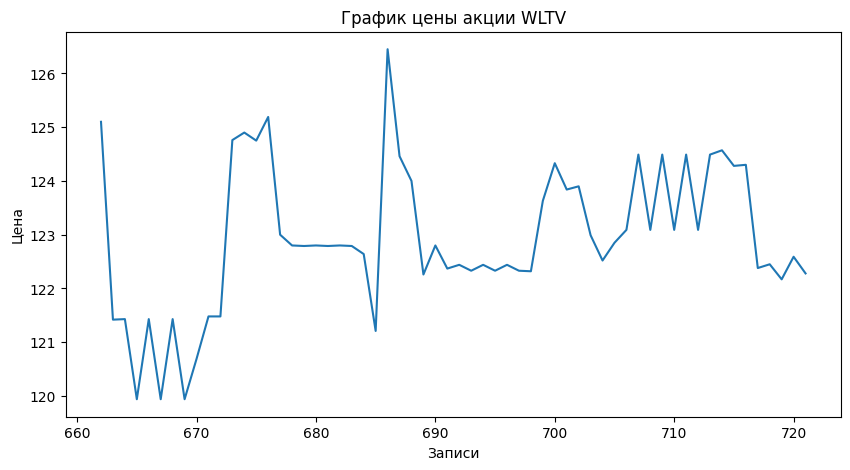

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['value'][index_train:])
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.title('График цены акции WLTV')
plt.show()

In [ ]:
X_train, X_test = X.iloc[:index_train-1], X.iloc[index_train-1:]
y_train, y_test = y[:index_train-1], y[index_train-1:]

X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Заполнение NaN значениями
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## RandomForest

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.9023759410000071


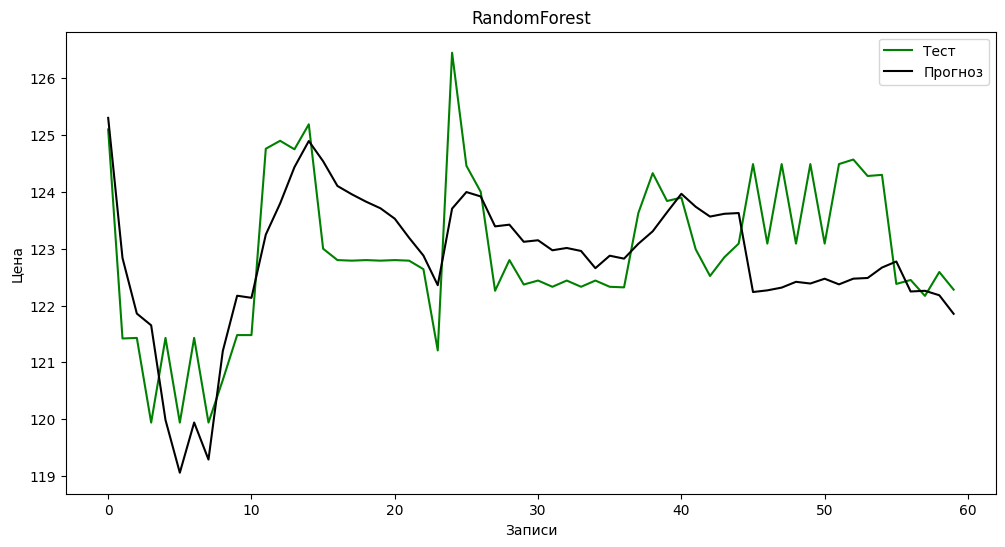

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Тест', color='green')
plt.plot(y_pred, label='Прогноз', color='black')
plt.title('RandomForest')
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

### расчет точности

In [ ]:
def df_custom(y_test):
    column_odd = y_test[::2]
    column_even = y_test[1::2]
    column_comparison = (column_even > column_odd).astype(float)
    df_ts = pd.DataFrame({
    'Open': column_odd,
    'Close': column_even,
    'Raising': column_comparison
    })

    return df_ts

def accuracy_direction(y_test, y_pred):
    y_test_df = df_custom(y_test)
    y_pred_df = df_custom(y_pred)
    accuracy_direction = np.mean(y_test_df['Raising'] == y_pred_df['Raising'])
    accuracy = accuracy_score(y_test_df['Raising'], y_pred_df['Raising'])
    return accuracy_direction

In [ ]:
res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Точность - 0.6666666666666666


## RandomForest(обучение с учетом MAE)

In [ ]:
import optuna
import time

In [ ]:
def objective(trial):
    start_time = time.time()

    n_estimators = trial.suggest_int('n_estimators', 25, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Создание модели
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred)
    end_time = time.time()
    print(f'Время: {(end_time - start_time)/60:.2f} минут')
    return mae


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)


In [ ]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = trial.params
model = RandomForestRegressor(**best_params, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Best trial:
  Value: 0.7952193422500949
  Params: 
    n_estimators: 50
    max_depth: 26
    min_samples_split: 5
    min_samples_leaf: 1
    max_features: None
MAE: 0.7952193422500974
Точность - 0.6333333333333333


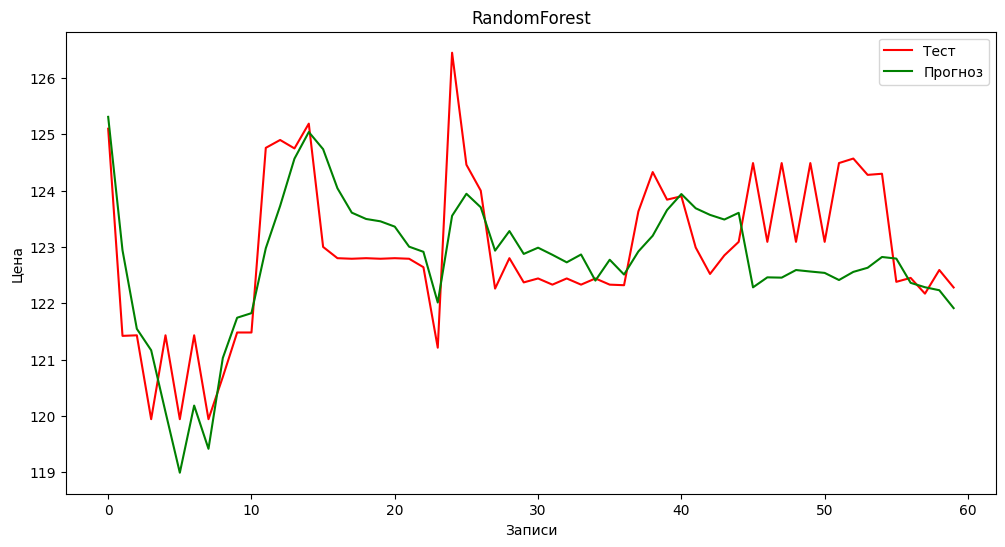

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Тест', color='red')
plt.plot(y_pred, label='Прогноз', color='green')
plt.title('RandomForest')
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

## RandomForest(обучение с учетом точности)

In [ ]:
def objective(trial):
    start_time = time.time()

    n_estimators = trial.suggest_int('n_estimators', 25, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Создание модели
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_direction(y_test, y_pred)

    end_time = time.time()
    print(f'Время: {(end_time - start_time)/60:.2f} минут')
    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)


In [ ]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = trial.params
model = RandomForestRegressor(**best_params, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Best trial:
  Value: 0.7666666666666667
  Params: 
    n_estimators: 496
    max_depth: 12
    min_samples_split: 12
    min_samples_leaf: 2
    max_features: None
MAE: 0.8822401009138275
Точность - 0.7666666666666667


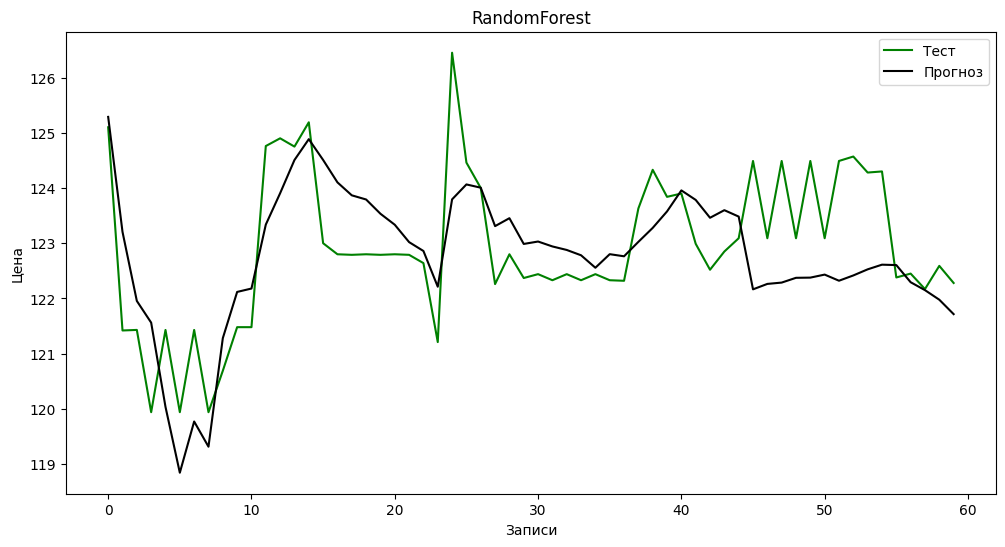

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Тест', color='green')
plt.plot(y_pred,label='Прогноз', color='black')
plt.title('RandomForest')
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

## XGBoost(с учетом MAE)

In [ ]:
import xgboost as xgb

In [ ]:
def objective(trial):
    start_time = time.time()
    lambda_value = trial.suggest_float('lambda', 1e-3, 10.0, log=True)
    alpha_value = trial.suggest_float('alpha', 1e-3, 10.0, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    n_estimators = trial.suggest_int('n_estimators', 25, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Создание модели с использованием GPU
    model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_lambda=lambda_value,
        reg_alpha=alpha_value,
        tree_method='hist',  # Используем метод построения дерева на CPU
        device='cuda',       # Указываем использование GPU через CUDA
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred)
    end_time = time.time()
    print(f'Время: {(end_time - start_time)/60:.2f} минут')
    return mae

# Запуск оптимизации с использованием Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

In [ ]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = trial.params

model = xgb.XGBRegressor(**best_params,
                         tree_method='hist',
                         device='cuda',
                         random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Best trial:
  Value: 0.5415385441975905
  Params: 
    lambda: 0.7752145913849308
    alpha: 0.003099078579837386
    learning_rate: 0.06769186079161225
    n_estimators: 976
    max_depth: 25
    min_child_weight: 4
    subsample: 0.5185076690487747
    colsample_bytree: 0.8546682103552393
MAE: 0.5415385441975905
Точность - 0.7


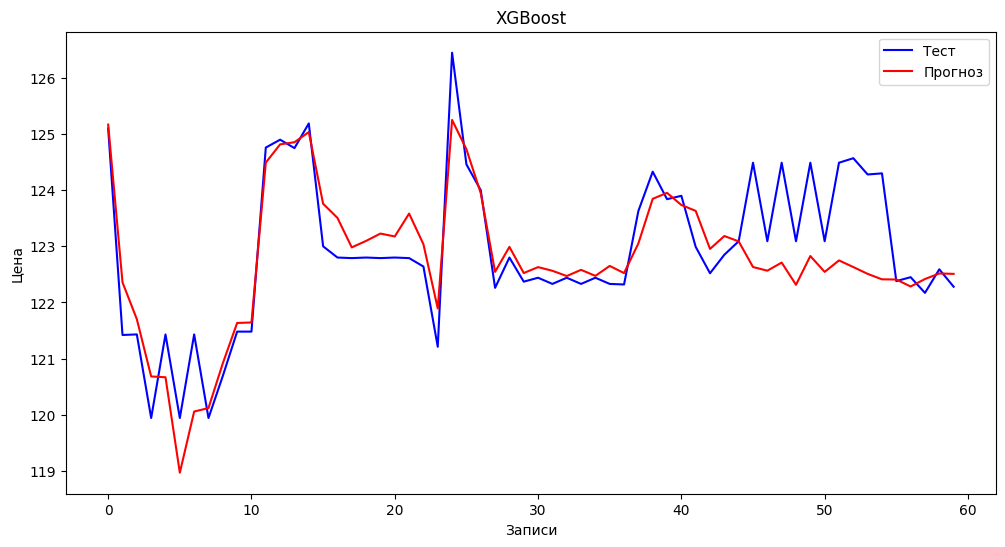

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Тест', color='blue')
plt.plot(y_pred, label='Прогноз', color='red')
plt.title('XGBoost')
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

## XGBoost(с учетом точности)

In [ ]:
def objective(trial):
    start_time = time.time()
    lambda_value = trial.suggest_float('lambda', 1e-3, 10.0, log=True)
    alpha_value = trial.suggest_float('alpha', 1e-3, 10.0, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    n_estimators = trial.suggest_int('n_estimators', 25, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Создание модели с использованием GPU
    model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_lambda=lambda_value,
        reg_alpha=alpha_value,
        tree_method='hist',  # Используем метод построения дерева на CPU
        device='cuda',       # Указываем использование GPU через CUDA
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    res = accuracy_direction(y_test, y_pred)

    end_time = time.time()
    print(f'Время: {(end_time - start_time)/60:.2f} минут')
    return res

# Запуск оптимизации с использованием Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250)

In [ ]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = trial.params

model = xgb.XGBRegressor(**best_params,
                         tree_method='hist',
                         device='cuda',
                         random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(mae)

res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Best trial:
  Value: 0.9
  Params: 
    lambda: 0.19086820234355484
    alpha: 0.23634401148646142
    learning_rate: 0.06207002590731471
    n_estimators: 626
    max_depth: 25
    min_child_weight: 1
    subsample: 0.9979389806056335
    colsample_bytree: 0.9234367244333033
0.9032786361572264
Точность - 0.9


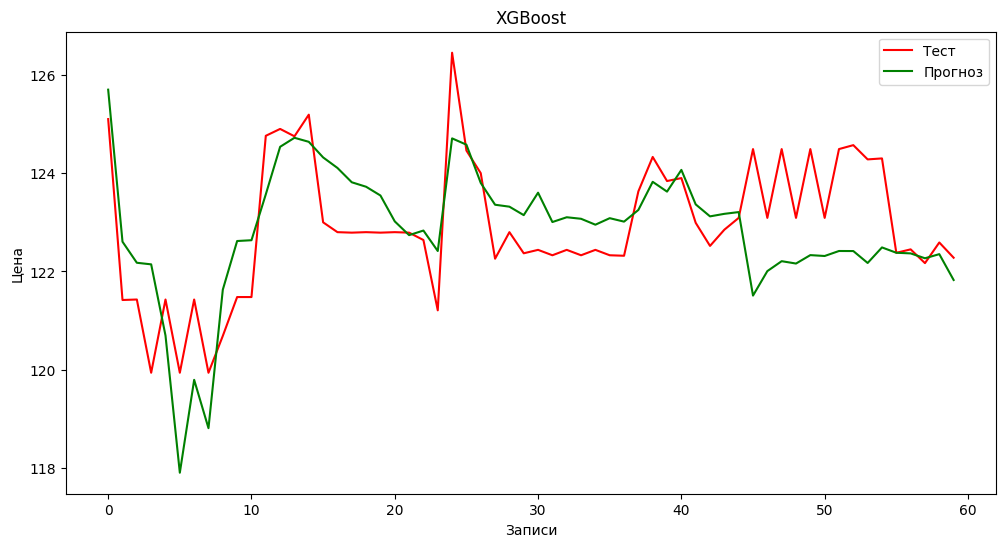

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Тест', color='red')
plt.plot(y_pred,label='Прогноз', color='green')
plt.title('XGBoost')
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

## Разлжение Фурье

In [ ]:
df_fur = df.copy()
df_fur = df_fur[['value']]


In [ ]:
import numpy as np
import pandas as pd
import cufflinks as cf

def fourier_transform(df):
    """
    Функция выполняет разложение временного ряда на компоненты с помощью преобразования Фурье.

    Аргументы:
    - df (pandas.DataFrame): Датафрейм с временными рядами.

    Возвращает:
    - (frequencies, magnitudes): частоты и соответствующие им магнитуды.
    """
    # Предполагаем, что временной ряд находится в первом столбце датафрейма
    data = df.iloc[:, 0].values
    n = len(data)
    # Преобразование Фурье
    fft_values = np.fft.fft(data)
    # Взятие модуля от комплексных чисел для получения магнитуды
    magnitudes = np.abs(fft_values)[:n // 2]
    # Вычисление соответствующих частот
    frequencies = np.fft.fftfreq(n)[:n // 2]

    return frequencies, magnitudes

In [ ]:
frequencies, magnitudes = fourier_transform(df_fur)

# Визуализация спектрограммы
spectrogram_df = pd.DataFrame({
    'Frequency': frequencies,
    'Magnitude': magnitudes
})


In [ ]:
spectrogram_df.iplot(x='Frequency', y='Magnitude', title='Fourier Transform - Spectrogram', xTitle='Frequency', yTitle='Magnitude')

Подготовка данных

In [ ]:
df_long, y = make_forecasting_frame(df_fur['value'], kind="value", max_timeshift=10, rolling_direction=1)
X = extract_features(df_long, column_id='id',column_value="value", column_sort='time')

top_k = 5
top_frequencies = frequencies[:top_k]
top_magnitudes = magnitudes[:top_k]

for i in range(top_k):
    X[f'fft_freq_{i+1}'] = top_frequencies[i]
    X[f'fft_magnitude_{i+1}'] = top_magnitudes[i]

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 29/29 [00:14<00:00,  1.96it/s]


In [ ]:
X_train, X_test = X.iloc[:index_train-1], X.iloc[index_train-1:]
y_train, y_test = y[:index_train-1], y[index_train-1:]

X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Заполнение NaN значениями
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## RandomForest

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Mean Absolute Error: 0.963035558333331
Точность - 0.5


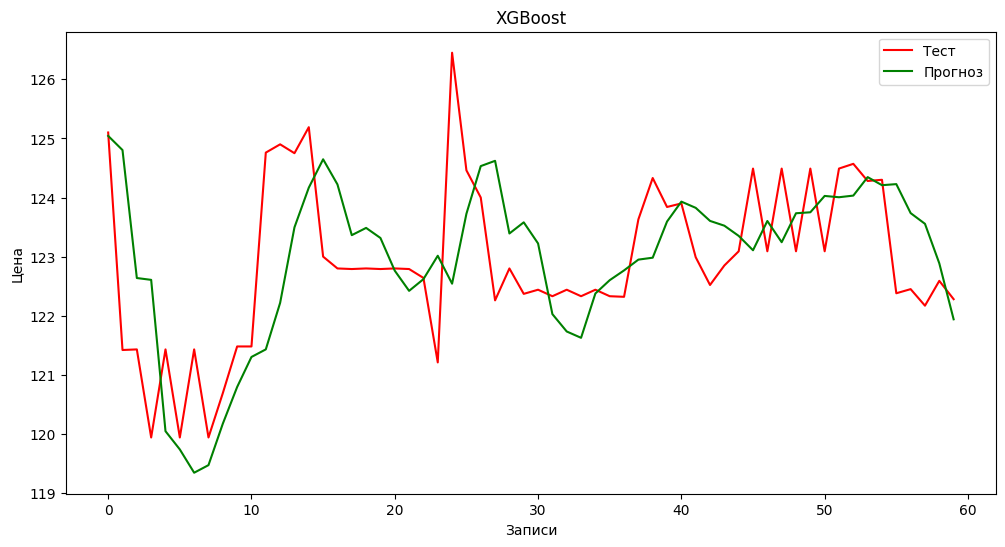

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Тест', color='red')
plt.plot(y_pred,label='Прогноз', color='green')
plt.title('XGBoost')
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

## RandomForest(с учетом MAE)

In [ ]:
def objective(trial):
    start_time = time.time()

    n_estimators = trial.suggest_int('n_estimators', 25, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Создание модели
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred)
    end_time = time.time()
    print(f'Время: {(end_time - start_time)/60:.2f} минут')
    return mae


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)


In [ ]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = trial.params
model = RandomForestRegressor(**best_params, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Best trial:
  Value: 0.960270740736524
  Params: 
    n_estimators: 864
    max_depth: 44
    min_samples_split: 22
    min_samples_leaf: 25
    max_features: log2
MAE: 0.9602707407365233
Точность - 0.5


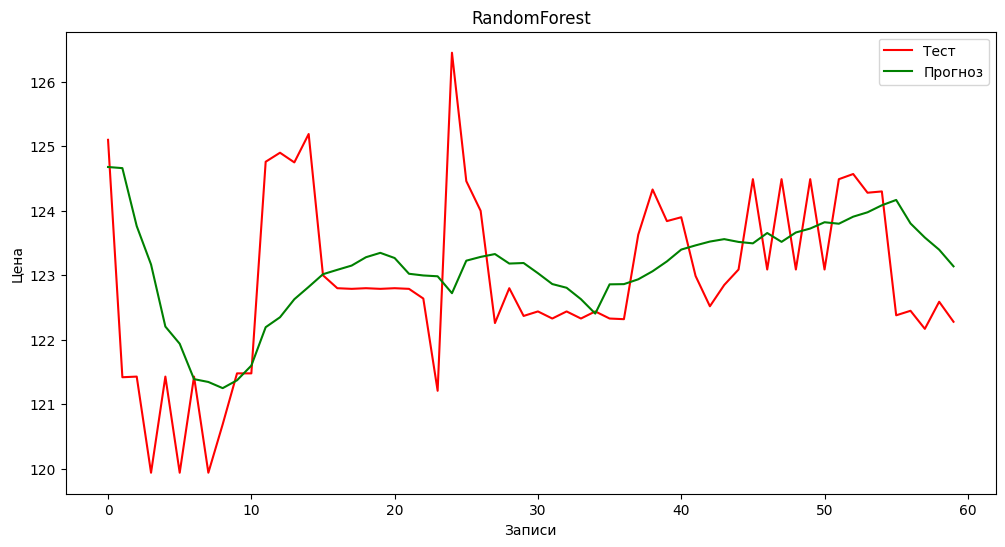

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Тест', color='red')
plt.plot(y_pred, label='Прогноз', color='green')
plt.title('RandomForest')
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

## RandomForest(с учетом точности)

In [ ]:
def objective(trial):
    start_time = time.time()

    n_estimators = trial.suggest_int('n_estimators', 25, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Создание модели
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_direction(y_test, y_pred)

    end_time = time.time()
    print(f'Время: {(end_time - start_time)/60:.2f} минут')
    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


In [ ]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = trial.params
model = RandomForestRegressor(**best_params, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Best trial:
  Value: 0.5666666666666667
  Params: 
    n_estimators: 315
    max_depth: 10
    min_samples_split: 12
    min_samples_leaf: 10
    max_features: sqrt
MAE: 1.0146229019379442
Точность - 0.5666666666666667


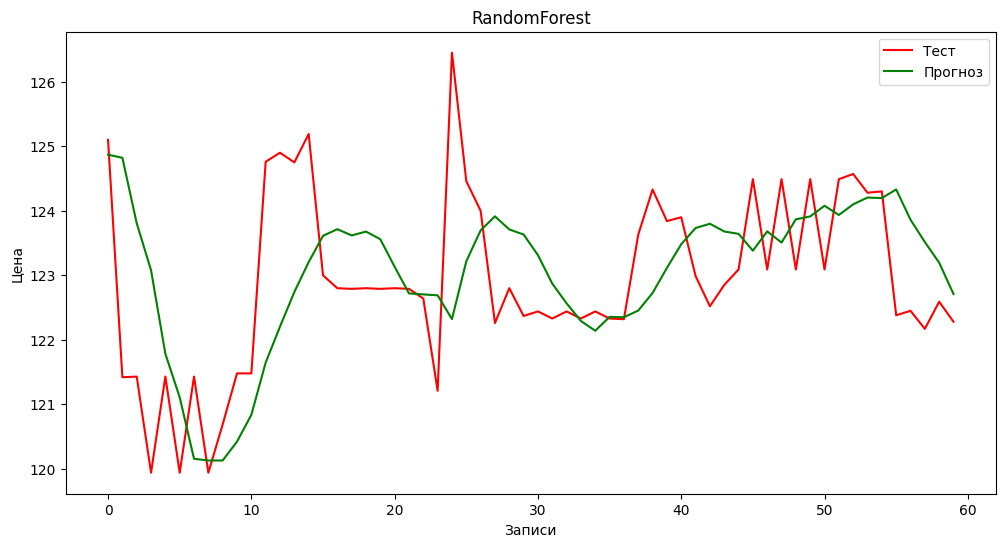

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Тест', color='red')
plt.plot(y_pred, label='Прогноз', color='green')
plt.title('RandomForest')
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

## XGBoost(с учетом MAE)

In [ ]:
def objective(trial):
    start_time = time.time()
    lambda_value = trial.suggest_float('lambda', 1e-3, 10.0, log=True)
    alpha_value = trial.suggest_float('alpha', 1e-3, 10.0, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    n_estimators = trial.suggest_int('n_estimators', 25, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Создание модели с использованием GPU
    model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_lambda=lambda_value,
        reg_alpha=alpha_value,
        tree_method='hist',  # Используем метод построения дерева на CPU
        device='cuda',       # Указываем использование GPU через CUDA
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred)
    end_time = time.time()
    print(f'Время: {(end_time - start_time)/60:.2f} минут')
    return mae

# Запуск оптимизации с использованием Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

In [ ]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = trial.params

model = xgb.XGBRegressor(**best_params,
                         tree_method='hist',
                         device='cuda',
                         random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(mae)

res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Best trial:
  Value: 0.8409568619059243
  Params: 
    lambda: 0.3497012877571753
    alpha: 7.040789453768618
    learning_rate: 0.056323420844026105
    n_estimators: 810
    max_depth: 14
    min_child_weight: 4
    subsample: 0.5986562895755212
    colsample_bytree: 0.9987287521227283
0.8409568619059243
Точность - 0.5333333333333333


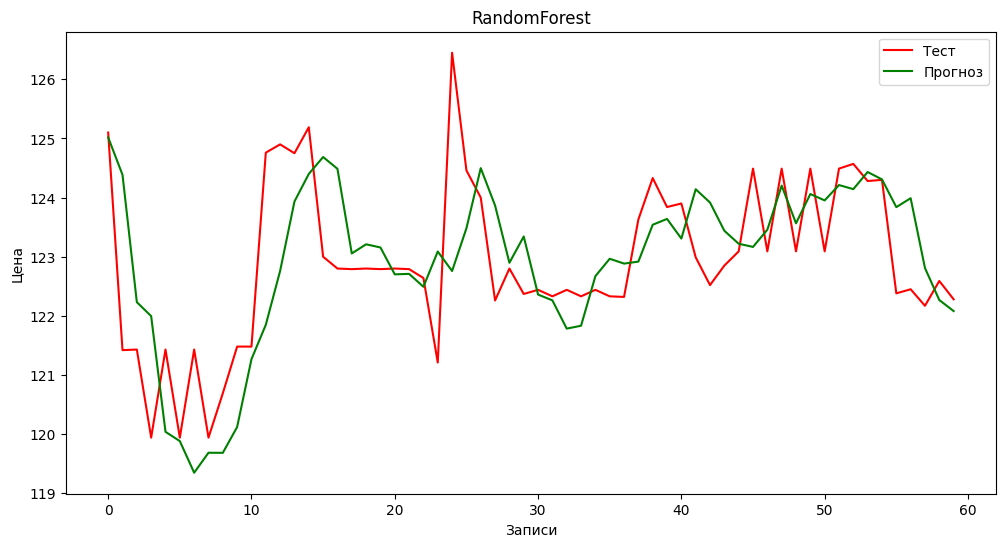

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Тест', color='red')
plt.plot(y_pred, label='Прогноз', color='green')
plt.title('RandomForest')
plt.xlabel('Записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

In [ ]:
def objective(trial):
    start_time = time.time()
    lambda_value = trial.suggest_float('lambda', 1e-3, 10.0, log=True)
    alpha_value = trial.suggest_float('alpha', 1e-3, 10.0, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    n_estimators = trial.suggest_int('n_estimators', 25, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Создание модели с использованием GPU
    model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_lambda=lambda_value,
        reg_alpha=alpha_value,
        tree_method='hist',  # Используем метод построения дерева на CPU
        device='cuda',       # Указываем использование GPU через CUDA
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    res = accuracy_direction(y_test, y_pred)

    end_time = time.time()
    print(f'Время: {(end_time - start_time)/60:.2f} минут')
    return res

# Запуск оптимизации с использованием Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [ ]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = trial.params

model = xgb.XGBRegressor(**best_params,
                         tree_method='hist',
                         device='cuda',
                         random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(mae)

res = accuracy_direction(y_test, y_pred)
print(f'Точность - {res}')

Best trial:
  Value: 0.6666666666666666
  Params: 
    lambda: 0.03848355541615934
    alpha: 0.2770880755901828
    learning_rate: 0.2890596749036811
    n_estimators: 625
    max_depth: 3
    min_child_weight: 1
    subsample: 0.5036929543037825
    colsample_bytree: 0.7346889477112617
1.036760710083008
Точность - 0.6666666666666666


In [ ]:
data = {
    "Модель": [
        "RandomForest(базовые х-ки -> MAE)",
        "RandomForest(базовые х-ки -> точность)",
        "RandomForest(Фурье -> MAE)",
        "RandomForest(Фурье -> точность)",
        "XGBoost(базовые х-ки -> MAE)",
        "XGBoost(базовые х-ки -> точность)",
        "XGBoost(Фурье -> MAE)",
        "XGBoost(Фурье -> точность)",

    ],
    "MAE": [0.79, 0.88, 0.96, 1.01, 0.54, 0.903, 0.841, 1.04],
    "Точность направления": ["63%", "77%", "50%", "57%", "70%", "90%", "53%", "67%"]
}

df = pd.DataFrame(data)
df

,Модель,MAE,Точность направления
0,RandomForest(базовые х-ки -> MAE),0.790,63%
1,RandomForest(базовые х-ки -> точность),0.880,77%
2,RandomForest(Фурье -> MAE),0.960,50%
3,RandomForest(Фурье -> точность),1.010,57%
4,XGBoost(базовые х-ки -> MAE),0.540,70%
5,XGBoost(базовые х-ки -> точность),0.903,90%
6,XGBoost(Фурье -> MAE),0.841,53%
7,XGBoost(Фурье -> точность),1.040,67%
